# 10. Basic Regression Analysis with Time Series Data

In [1]:
%pip install matplotlib numpy pandas statsmodels wooldridge -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np  # noqa
import pandas as pd
import statsmodels.formula.api as smf
import wooldridge as wool

## 10.1 Static Time Series Models

$$ y_t = \beta_0 + \beta_1 z_{1t} + \beta_2 z_{2t} + \cdots + \beta_k z_{kt} + u_t $$

### Example 10.2 Effects of Inflation and Deficits on Interest Rates

In [3]:
intdef = wool.dataWoo("intdef")

# linear regression of static model (Q function avoids conflicts with keywords):
reg = smf.ols(formula='i3 ~ Q("inf") + Q("def")', data=intdef)
results = reg.fit()

# print regression table:
table = pd.DataFrame(
    {
        "b": round(results.params, 4),
        "se": round(results.bse, 4),
        "t": round(results.tvalues, 4),
        "pval": round(results.pvalues, 4),
    },
)
print(f"table: \n{table}\n")

table: 
                b      se       t    pval
Intercept  1.7333  0.4320  4.0125  0.0002
Q("inf")   0.6059  0.0821  7.3765  0.0000
Q("def")   0.5131  0.1184  4.3338  0.0001



## 10.2 Time Series Data Types in Python

### 10.2.1 Equispaced Time Series in Python

In [4]:
barium = wool.dataWoo("barium")
T = len(barium)

# monthly time series starting Feb. 1978:
barium.index = pd.date_range(start="1978-02", periods=T, freq="ME")
print(f'barium["chnimp"].head(): \n{barium["chnimp"].head()}\n')

barium["chnimp"].head(): 
1978-02-28    220.462006
1978-03-31     94.797997
1978-04-30    219.357498
1978-05-31    317.421509
1978-06-30    114.639000
Freq: ME, Name: chnimp, dtype: float64



Text(0.5, 0, 'time')

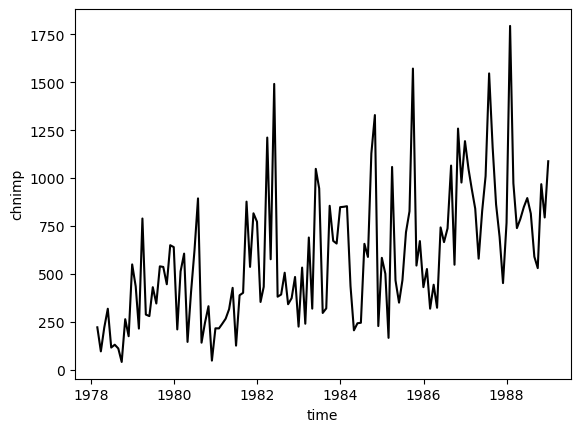

In [5]:
# plot chnimp (default: index on the x-axis):
plt.plot("chnimp", data=barium, color="black", linestyle="-")
plt.ylabel("chnimp")
plt.xlabel("time")

## 10.3 Other Time Series Models

### 10.3.1 Finite Distributed Lag Models

$$ y_t = \alpha_0 + \delta_0 z_t + \delta_1 z_{t-1} + \cdots + \delta_k z_{t-k} + u_t $$

### Example 10.4 Effects of Personal Exemption on Fertility Rates

In [6]:
fertil3 = wool.dataWoo("fertil3")
T = len(fertil3)

# define yearly time series beginning in 1913:
fertil3.index = pd.date_range(start="1913", periods=T, freq="YE").year

# add all lags of 'pe' up to order 2:
fertil3["pe_lag1"] = fertil3["pe"].shift(1)
fertil3["pe_lag2"] = fertil3["pe"].shift(2)

# linear regression of model with lags:
reg = smf.ols(formula="gfr ~ pe + pe_lag1 + pe_lag2 + ww2 + pill", data=fertil3)
results = reg.fit()

# print regression table:
table = pd.DataFrame(
    {
        "b": round(results.params, 4),
        "se": round(results.bse, 4),
        "t": round(results.tvalues, 4),
        "pval": round(results.pvalues, 4),
    },
)
print(f"table: \n{table}\n")

table: 
                 b       se        t    pval
Intercept  95.8705   3.2820  29.2114  0.0000
pe          0.0727   0.1255   0.5789  0.5647
pe_lag1    -0.0058   0.1557  -0.0371  0.9705
pe_lag2     0.0338   0.1263   0.2679  0.7896
ww2       -22.1265  10.7320  -2.0617  0.0433
pill      -31.3050   3.9816  -7.8625  0.0000



### Eample 10.4 (continued)

In [7]:
fertil3 = wool.dataWoo("fertil3")
T = len(fertil3)

# define yearly time series beginning in 1913:
fertil3.index = pd.date_range(start="1913", periods=T, freq="YE").year

# add all lags of 'pe' up to order 2:
fertil3["pe_lag1"] = fertil3["pe"].shift(1)
fertil3["pe_lag2"] = fertil3["pe"].shift(2)

# linear regression of model with lags:
reg = smf.ols(formula="gfr ~ pe + pe_lag1 + pe_lag2 + ww2 + pill", data=fertil3)
results = reg.fit()

# F test (H0: all pe coefficients are=0):
hypotheses1 = ["pe = 0", "pe_lag1 = 0", "pe_lag2 = 0"]
ftest1 = results.f_test(hypotheses1)
fstat1 = ftest1.statistic
fpval1 = ftest1.pvalue

print(f"fstat1: {fstat1}\n")
print(f"fpval1: {fpval1}\n")

fstat1: 3.9729640469785323

fpval1: 0.011652005303126576



In [8]:
# calculating the LRP:
b = results.params
b_pe_tot = b["pe"] + b["pe_lag1"] + b["pe_lag2"]
print(f"b_pe_tot: {b_pe_tot}\n")

b_pe_tot: 0.10071909027975486



In [9]:
# F test (H0: LRP=0):
hypotheses2 = ["pe + pe_lag1 + pe_lag2 = 0"]
ftest2 = results.f_test(hypotheses2)
fstat2 = ftest2.statistic
fpval2 = ftest2.pvalue

print(f"fstat2: {fstat2}\n")
print(f"fpval2: {fpval2}\n")

fstat2: 11.421238467853499

fpval2: 0.0012408438602971525



### 10.3.2 Trends

### Example 10.7 Housing Investment and Prices

In [10]:
hseinv = wool.dataWoo("hseinv")

# linear regression without time trend:
reg_wot = smf.ols(formula="np.log(invpc) ~ np.log(price)", data=hseinv)
results_wot = reg_wot.fit()

# print regression table:
table_wot = pd.DataFrame(
    {
        "b": round(results_wot.params, 4),
        "se": round(results_wot.bse, 4),
        "t": round(results_wot.tvalues, 4),
        "pval": round(results_wot.pvalues, 4),
    },
)
print(f"table_wot: \n{table_wot}\n")

table_wot: 
                    b      se        t    pval
Intercept     -0.5502  0.0430 -12.7882  0.0000
np.log(price)  1.2409  0.3824   3.2450  0.0024



In [11]:
# linear regression with time trend (data set includes a time variable t):
reg_wt = smf.ols(formula="np.log(invpc) ~ np.log(price) + t", data=hseinv)
results_wt = reg_wt.fit()

# print regression table:
table_wt = pd.DataFrame(
    {
        "b": round(results_wt.params, 4),
        "se": round(results_wt.bse, 4),
        "t": round(results_wt.tvalues, 4),
        "pval": round(results_wt.pvalues, 4),
    },
)
print(f"table_wt: \n{table_wt}\n")

table_wt: 
                    b      se       t    pval
Intercept     -0.9131  0.1356 -6.7328  0.0000
np.log(price) -0.3810  0.6788 -0.5612  0.5779
t              0.0098  0.0035  2.7984  0.0079



### 10.3.3 Seasonality

### Example 10.11 Effects of Antidumping Filings

In [12]:
barium = wool.dataWoo("barium")

# linear regression with seasonal effects:
reg = smf.ols(
    formula="np.log(chnimp) ~ np.log(chempi) + np.log(gas) +"
    "np.log(rtwex) + befile6 + affile6 + afdec6 +"
    "feb + mar + apr + may + jun + jul +"
    "aug + sep + oct + nov + dec",
    data=barium,
)
results = reg.fit()

# print regression table:
table = pd.DataFrame(
    {
        "b": round(results.params, 4),
        "se": round(results.bse, 4),
        "t": round(results.tvalues, 4),
        "pval": round(results.pvalues, 4),
    },
)
print(f"table: \n{table}\n")

table: 
                      b       se       t    pval
Intercept       16.7792  32.4286  0.5174  0.6059
np.log(chempi)   3.2651   0.4929  6.6238  0.0000
np.log(gas)     -1.2781   1.3890 -0.9202  0.3594
np.log(rtwex)    0.6630   0.4713  1.4068  0.1622
befile6          0.1397   0.2668  0.5236  0.6016
affile6          0.0126   0.2787  0.0453  0.9639
afdec6          -0.5213   0.3019 -1.7264  0.0870
feb             -0.4177   0.3044 -1.3720  0.1728
mar              0.0591   0.2647  0.2231  0.8239
apr             -0.4515   0.2684 -1.6822  0.0953
may              0.0333   0.2692  0.1237  0.9018
jun             -0.2063   0.2693 -0.7663  0.4451
jul              0.0038   0.2788  0.0138  0.9890
aug             -0.1571   0.2780 -0.5650  0.5732
sep             -0.1342   0.2677 -0.5012  0.6172
oct              0.0517   0.2669  0.1937  0.8467
nov             -0.2463   0.2628 -0.9370  0.3508
dec              0.1328   0.2714  0.4894  0.6255

